
# <center> Escuela Politécnica Nacional </center>

**Nombre:** Francisco Ulloa<br>
**Fecha:** Quito, 28 de enero de 2026<br>
**Tema:** Gauss-Jacobi y Gauss-Seidel  <br>
**Repositorio:**<br>
https://github.com/Fu5CHAR/Metodos_numericos_2025B_Ulloa-Francisco/tree/main

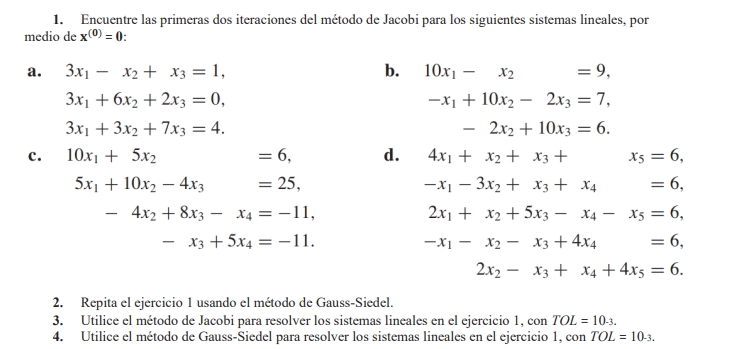

In [1]:
import numpy as np

TOL = 1e-2  # Tolerancia
MAX_ITER = 100  # Límite de iteraciones

def jacobi(A, b, x0=None, tol=TOL, max_iter=MAX_ITER):
    n = len(b)
    x = np.zeros(n) if x0 is None else x0.copy()
    x_new = np.zeros(n)

    for k in range(max_iter):
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]

        if k < 2:
            print(f"Jacobi - Iteración {k+1}: {x_new}")

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        
        x[:] = x_new

    return x

def gauss_seidel(A, b, x0=None, tol=TOL, max_iter=MAX_ITER):
    n = len(b)
    x = np.zeros(n) if x0 is None else x0.copy()

    for k in range(max_iter):
        x_old = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x[j] for j in range(i))
            s2 = sum(A[i][j] * x_old[j] for j in range(i + 1, n))
            x[i] = (b[i] - s1 - s2) / A[i][i]

        if k < 2:
            print(f"Gauss-Seidel - Iteración {k+1}: {x}")

        if np.linalg.norm(x - x_old, ord=np.inf) < tol:
            return x

    return x

**Sistema 1**

In [3]:

A = np.array([[3, -1, 1],
              [3, 6, 2],
              [3, 3, 7]], dtype=float)

b = np.array([1, 0, 4], dtype=float)

print("Resultado con Jacobi:")
print('Jacobi:', jacobi(A, b))

print("\nResultado con Gauss-Seidel:")
print('Seidel:', gauss_seidel(A, b))

Resultado con Jacobi:
Jacobi - Iteración 1: [0.33333333 0.         0.57142857]
Jacobi - Iteración 2: [ 0.14285714 -0.35714286  0.42857143]
Jacobi: [ 0.03490444 -0.23975543  0.6547619 ]

Resultado con Gauss-Seidel:
Gauss-Seidel - Iteración 1: [ 0.33333333 -0.16666667  0.5       ]
Gauss-Seidel - Iteración 2: [ 0.11111111 -0.22222222  0.61904762]
Seidel: [ 0.0361492  -0.23660752  0.65733928]


**Sistema 2**

In [4]:
A = np.array([[10, -1, 0],
              [-1, 10, -2],
              [0, -2, 10]], dtype=float)
b = np.array([9, 7, 6], dtype=float)

print("\nSistema 1b:")
print("Jacobi:", jacobi(A, b))
print("Seidel:", gauss_seidel(A, b))


Sistema 1b:
Jacobi - Iteración 1: [0.9 0.7 0.6]
Jacobi - Iteración 2: [0.97 0.91 0.74]
Jacobi: [0.99555 0.95725 0.7911 ]
Gauss-Seidel - Iteración 1: [0.9   0.79  0.758]
Gauss-Seidel - Iteración 2: [0.979  0.9495 0.7899]
Seidel: [0.9957475  0.95787375 0.79157475]


**Sistema 3**

In [5]:
A = np.array([[10, 5, 0, 0],
              [5, 10, -4, 0],
              [0, -4, 8, -1],
              [0, 0, -1, 5]], dtype=float)
b = np.array([6, 25, -11, -11], dtype=float)

print("\nSistema 1c:")
print("Jacobi:", jacobi(A, b))
print("Seidel:", gauss_seidel(A, b))


Sistema 1c:
Jacobi - Iteración 1: [ 0.6    2.5   -1.375 -2.2  ]
Jacobi - Iteración 2: [-0.65   1.65  -0.4   -2.475]
Jacobi: [-0.79213889  2.79403779 -0.2646472  -2.25205255]
Gauss-Seidel - Iteración 1: [ 0.6    2.2   -0.275 -2.255]
Gauss-Seidel - Iteración 2: [-0.5       2.64     -0.336875 -2.267375]
Seidel: [-0.79019461  2.78841617 -0.26245949 -2.2524919 ]


**Sistema 4**

In [7]:
A = np.array([[4, 1, 1, 0, 1],
              [-1, -3, 1, 1, 0],
              [2, 1, 5, -1, -1],
              [-1, -1, -1, 4, 0],
              [0, 2, -1, 1, 4]], dtype=float)
b = np.array([6, 6, 6, 6, 6], dtype=float)

print("\nSistema 1d:")
print("Jacobi:", jacobi(A, b))
print("Seidel:", gauss_seidel(A, b))


Sistema 1d:
Jacobi - Iteración 1: [ 1.5 -2.   1.2  1.5  1.5]
Jacobi - Iteración 2: [ 1.325 -1.6    1.6    1.675  2.425]
Jacobi: [ 0.7850751  -0.99873844  1.8646296   1.91522095  1.98538479]
Gauss-Seidel - Iteración 1: [ 1.5     -2.5      1.1      1.525    2.64375]
Gauss-Seidel - Iteración 2: [ 1.1890625  -1.52135417  1.86239583  1.88252604  2.25564453]
Seidel: [ 0.78616258 -1.00240703  1.86606999  1.91245638  1.98960692]


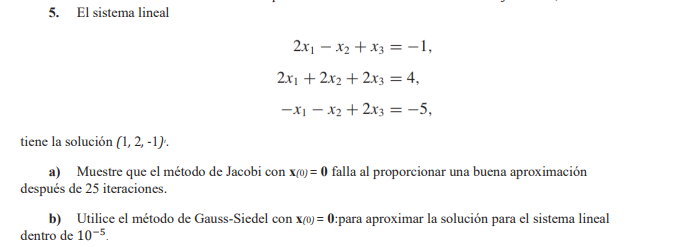

In [8]:
import numpy as np

def jacobi(A, b, x0, max_iter=25):
    n = len(b)
    x = x0.copy()
    x_new = np.zeros_like(x)
    history = []
    
    for k in range(max_iter):
        for i in range(n):
            s = np.dot(A[i,:], x) - A[i,i]*x[i]
            x_new[i] = (b[i] - s) / A[i,i]
        
        x = x_new.copy()
        history.append(x.copy())
        
    return x, np.array(history)

# Sistema dado
A = np.array([[2, -1, 1],
              [2, 2, 2],
              [-1, -1, 2]])
b = np.array([-1, 4, -5])
x0 = np.zeros(3)

# Aplicar Jacobi
x_jacobi, hist_jacobi = jacobi(A, b, x0)
print("Resultado después de 25 iteraciones (Jacobi):", x_jacobi)

#Sistema 
A = np.array([[2, -1, 1],
              [2, 2, 2],
              [-1, -1, 2]])
b = np.array([-1, 4, -5])
x0 = np.zeros(3)

# Aplicar Jacobi con solo 25 iteraciones
x_jacobi, hist_jacobi = jacobi(A, b, x0)
print("Resultado después de 25 iteraciones (Jacobi):", x_jacobi)

Resultado después de 25 iteraciones (Jacobi): [-20.82787284   2.         -22.82787284]
Resultado después de 25 iteraciones (Jacobi): [-20.82787284   2.         -22.82787284]


Con Gauss-Jacobi el sistema no llega a una solución adecuada.

In [9]:
def gauss_seidel(A, b, x0, tol=1e-5, max_iter=100):
    n = len(b)
    x = x0.copy()
    history = []
    
    for k in range(max_iter):
        x_old = x.copy()
        for i in range(n):
            s1 = np.dot(A[i,:i], x[:i])
            s2 = np.dot(A[i,i+1:], x_old[i+1:])
            x[i] = (b[i] - s1 - s2) / A[i,i]
        
        history.append(x.copy())
        if np.linalg.norm(x - x_old) < tol:
            break
    
    return x, np.array(history)

#Sistema 
A = np.array([[2, -1, 1],
              [2, 2, 2],
              [-1, -1, 2]])
b = np.array([-1, 4, -5])
x0 = np.zeros(3)

# Aplicar Gauss-Seidel
x_gs, hist_gs = gauss_seidel(A, b, x0)
print("Resultado Gauss-Seidel:", x_gs)
print("Iteraciones realizadas:", len(hist_gs))

Resultado Gauss-Seidel: [ 1.00000226  1.9999975  -1.00000012]
Iteraciones realizadas: 23


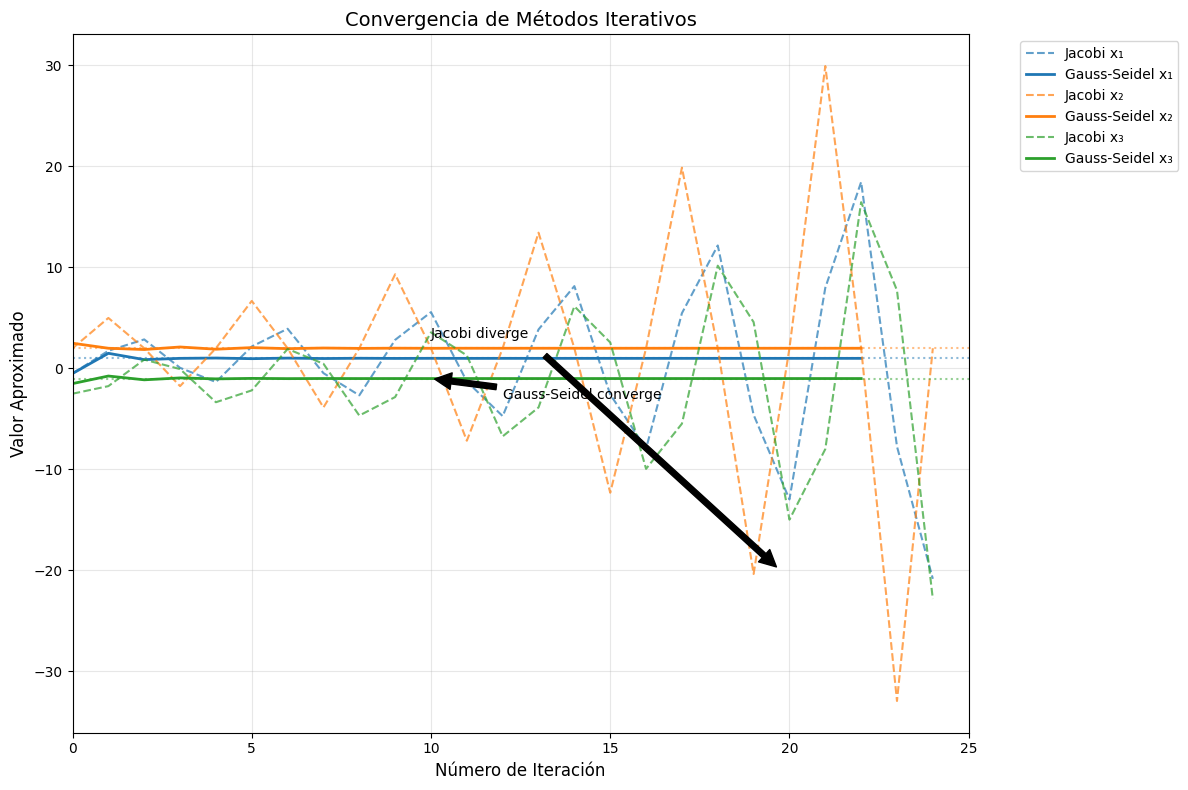

In [15]:
import numpy as np
import matplotlib.pyplot as plt

sol_exacta = [1,2,-1]
# Crear gráfico
plt.figure(figsize=(12, 8))
variables = ['x₁', 'x₂', 'x₃']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
styles = {'Jacobi': '--', 'Gauss-Seidel': '-'}

for i in range(3):
    # Jacobi
    plt.plot(range(25), hist_jacobi[:,i], styles['Jacobi'], 
             color=colors[i], label=f'Jacobi {variables[i]}', alpha=0.7)
    
    # Gauss-Seidel
    gs_iter = len(hist_gs)
    plt.plot(range(gs_iter), hist_gs[:,i], styles['Gauss-Seidel'],
             color=colors[i], label=f'Gauss-Seidel {variables[i]}', linewidth=2)
    
    # Solución exacta
    plt.axhline(y=sol_exacta[i], color=colors[i], linestyle=':', alpha=0.5)

plt.title('Convergencia de Métodos Iterativos', fontsize=14)
plt.xlabel('Número de Iteración', fontsize=12)
plt.ylabel('Valor Aproximado', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(0, max(25, len(hist_gs)+1))
plt.tight_layout()

# Añadir anotaciones
plt.annotate('Jacobi diverge', xy=(20, hist_jacobi[-1,0]), xytext=(10, 3),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Gauss-Seidel converge', xy=(10, hist_gs[10,2]), xytext=(12, -3),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

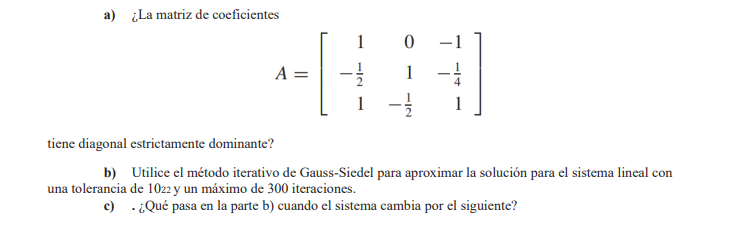
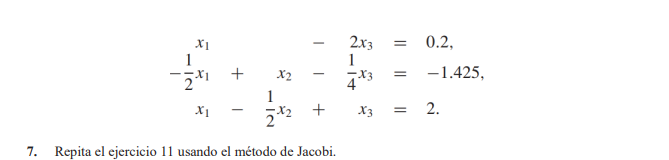

a) La matriz no es diagonal dominante.

In [16]:
import numpy as np

def gauss_seidel_mejorado(A, b, tol=1e-22, max_iter=300):
    n = len(b)
    x = np.zeros(n)
    
    for k in range(max_iter):
        x_old = x.copy()
        
        for i in range(n):
            # Evitar división por cero
            if A[i,i] == 0:
                # Buscar intercambio de filas
                for j in range(i+1, n):
                    if A[j,i] != 0:
                        A[[i,j]] = A[[j,i]]  # Intercambiar filas
                        b[[i,j]] = b[[j,i]]
                        break
                if A[i,i] == 0:
                    raise ValueError("Sistema singular - no se puede resolver")
            
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i+1:], x_old[i+1:])
            x[i] = (b[i] - s1 - s2) / A[i,i]
        
        if np.linalg.norm(x - x_old) < tol:
            print(f'Convergencia en {k+1} iteraciones')
            return x
    
    print("Advertencia: Máximo de iteraciones alcanzado")
    return x

A_corr = np.array([
    [1.0,   0.0,    -1.0],
    [0.5,   0.1,    -0.25], 
    [1.0,  -0.5,     1.0]
])

b_corr = np.array([0.2, -1.425, 2.0])

# Solución del sistema corregido
sol = gauss_seidel_mejorado(A_corr, b_corr)
print("Solución del sistema corregido:", sol)

# Verificación
print("\nVerificación:")
print("A·x - b =", np.dot(A_corr, sol) - b_corr)

Advertencia: Máximo de iteraciones alcanzado
Solución del sistema corregido: [-3.59737311e+105  8.99343277e+105  8.09408950e+105]

Verificación:
A·x - b = [-1.16914626e+106 -2.92286565e+105 -2.00000000e+000]


In [19]:
def gauss_seidel(A, b, x0, tol=1e-5, max_iter=100):
    n = len(b)
    x = x0.copy()
    history = []
    
    for k in range(max_iter):
        x_old = x.copy()
        for i in range(n):
            s1 = np.dot(A[i,:i], x[:i])
            s2 = np.dot(A[i,i+1:], x_old[i+1:])
            x[i] = (b[i] - s1 - s2) / A[i,i]
        
        history.append(x.copy())
        if np.linalg.norm(x - x_old) < tol:
            break
    
    return x, np.array(history)

#Sistema 
A = np.array([[2, -1, 1],
              [2, 2, 2],
              [-1, -1, 2]])
b = np.array([-1, 4, -5])
x0 = np.zeros(3)

# Aplicar Gauss-Seidel
x_gs, hist_gs = gauss_seidel(A, b, x0)
print("Resultado Gauss-Seidel:", x_gs)
print("Iteraciones realizadas:", len(hist_gs))
A_mod = np.array([
    [1.0,   0.0,    -2.0],
    [-0.5,  1.0,    -0.25],
    [1.0,   -0.5,    1.0]
])

b = np.array([0.2, -1.425, 2.0])

hist = gauss_seidel(A_mod, b, x0)
solucion = hist[-1]
print("Solución con sistema modificado", solucion)

Resultado Gauss-Seidel: [ 1.00000226  1.9999975  -1.00000012]
Iteraciones realizadas: 23
Solución con sistema modificado [[ 2.00000000e-01 -1.32500000e+00  1.13750000e+00]
 [ 2.47500000e+00  9.68750000e-02 -4.26562500e-01]
 [-6.53125000e-01 -1.85820313e+00  1.72402344e+00]
 [ 3.64804688e+00  8.30029297e-01 -1.23303223e+00]
 [-2.26606445e+00 -2.86629028e+00  2.83291931e+00]
 [ 5.86583862e+00  2.21614914e+00 -2.75776405e+00]
 [-5.31552811e+00 -4.77220507e+00  4.92942557e+00]
 [ 1.00588511e+01  4.83678197e+00 -5.64046016e+00]
 [-1.10809203e+01 -8.37557520e+00  8.89313272e+00]
 [ 1.79862654e+01  9.79141591e+00 -1.10905575e+01]
 [-2.19811150e+01 -1.51881969e+01  1.63870166e+01]
 [ 3.29740331e+01  1.91587707e+01 -2.13946478e+01]
 [-4.25892955e+01 -2.80683097e+01  3.05551407e+01]
 [ 6.13102814e+01  3.68689258e+01 -4.08758184e+01]
 [-8.15516369e+01 -5.24197730e+01  5.73417503e+01]
 [ 1.14883501e+02  7.03521879e+01 -7.77074067e+01]
 [-1.55214813e+02 -9.84592584e+01  1.07985184e+02]
 [ 2.1617036

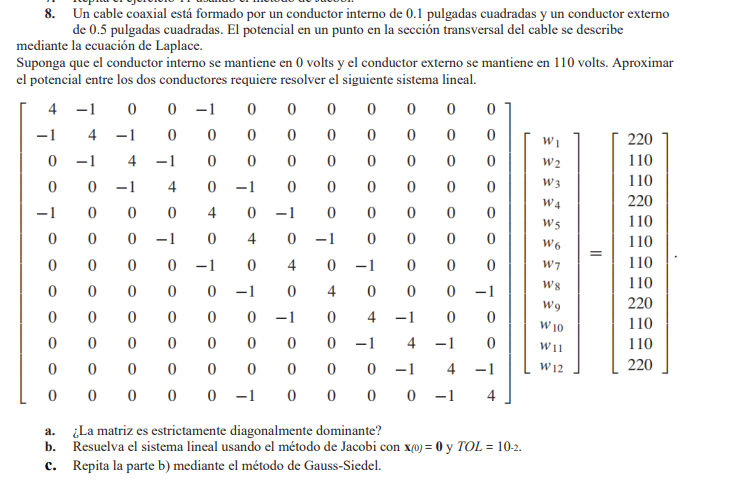

a) La matriz es diagonal dominante.

In [24]:
import numpy as np
import numpy as np

TOL = 1e-2  # Tolerancia
MAX_ITER = 100  # Límite de iteraciones

def jacobi(A, b, x0=None, tol=TOL, max_iter=MAX_ITER):
    n = len(b)
    x = np.zeros(n) if x0 is None else x0.copy()
    x_new = np.zeros(n)

    for k in range(max_iter):
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        
        x[:] = x_new

    return x

def gauss_seidel(A, b, x0=None, tol=TOL, max_iter=MAX_ITER):
    n = len(b)
    x = np.zeros(n) if x0 is None else x0.copy()

    for k in range(max_iter):
        x_old = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x[j] for j in range(i))
            s2 = sum(A[i][j] * x_old[j] for j in range(i + 1, n))
            x[i] = (b[i] - s1 - s2) / A[i][i]


        if np.linalg.norm(x - x_old, ord=np.inf) < tol:
            return x

    return x
x0 = [0,0,0,0,0,0,0,0,0,0,0,0,]
A = np.array([
    [ 4, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0],
    [-1,  4, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0, -1,  4, -1,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0, -1,  4,  0, -1,  0,  0,  0,  0,  0,  0],
    [-1, 0,  0,  0,  4,  0, -1,  0,  0,  0,  0,  0],
    [ 0, 0,  0, -1,  0,  4,  0, -1,  0,  0,  0,  0],
    [ 0, 0,  0,  0, -1,  0,  4,  0, -1,  0,  0,  0],
    [ 0, 0,  0,  0,  0, -1,  0,  4,  0,  0,  0, -1],
    [ 0, 0,  0,  0,  0,  0, -1,  0,  4, -1,  0,  0],
    [ 0, 0,  0,  0,  0,  0,  0,  0, -1,  4, -1,  0],
    [ 0, 0,  0,  0,  0,  0,  0,  0,  0, -1,  4, -1],
    [ 0, 0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  4]
], dtype=float)

b = np.array([
    220, 110, 110, 220,
    110, 110, 110, 110,
    220, 110, 110, 220
], dtype=float)



print("Jacobi:", jacobi(A, b),'\n')
print("Gauss-Seidel:", gauss_seidel(A, b))

Jacobi: [87.9910484  65.99104807 65.99104807 87.9910484  65.99104807 65.99104807
 65.99104807 65.99104807 87.9910484  65.99104807 65.99104807 87.9910484 ] 

Gauss-Seidel: [87.9986895  65.99931189 65.99963128 87.99980331 65.99931189 65.99989703
 65.99963128 65.99994736 87.99980331 65.99989703 65.99994736 87.99997368]
